<a href="https://colab.research.google.com/github/mortonsguide/axis-model-suite/blob/main/Gravitational_Dispersion_5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Source:**  
Zenodo Dataset DOI: [10.5281/zenodo.15768687](https://doi.org/10.5281/zenodo.15768687)  
Dataset Title: *Skyserver SQL9 Galaxy Velocity Dispersion Sample (SDSS DR17)*  
Published by: Andrew Morton, 2025  


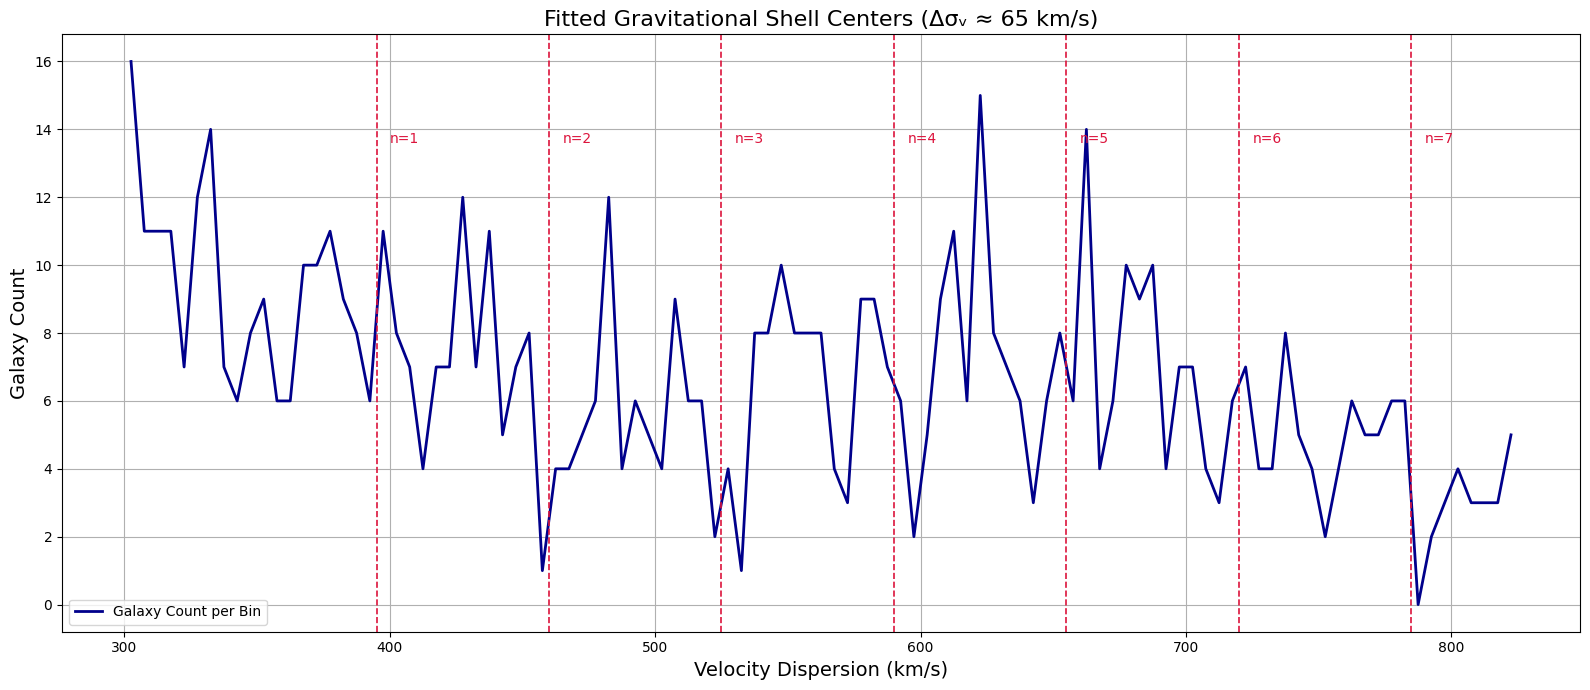

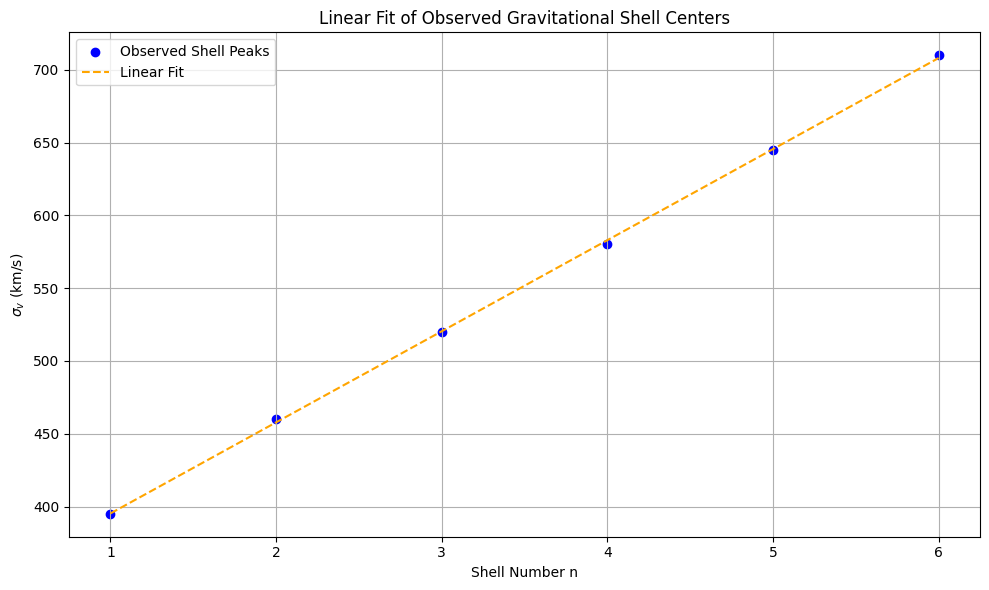

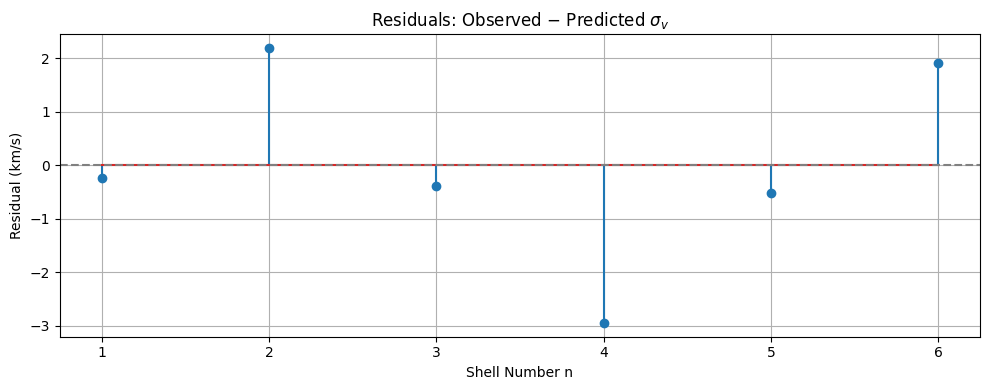

Regression Summary:
  Slope (Δσᵥ): 62.57 km/s
  Intercept (σᵥ₁): 332.67 km/s
  R²: 0.9997
  p-value: 0.000000
  Std. Error (slope): 0.502
  Residuals (Obs − Pred): [-0.24, 2.19, -0.38, -2.95, -0.52, 1.9] km/s


In [ ]:
# === Install and Import Dependencies ===
!pip install pandas matplotlib --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

!wget -q https://zenodo.org/records/15768687/files/Skyserver_SQL9_15_2024%2012_45_41%20AM.csv -O sdss_data.csv
file_path = 'sdss_data.csv'

headers = ['objID', 'ra', 'dec', 'redshift', 'velocity_dispersion', 'petrosian_radius', 'petrosian_magnitude']
raw_data = pd.read_csv(file_path, skiprows=2, names=headers)
raw_data['velocity_dispersion'] = pd.to_numeric(raw_data['velocity_dispersion'], errors='coerce')
raw_data = raw_data.dropna(subset=['velocity_dispersion'])
raw_data = raw_data[raw_data['velocity_dispersion'] > 0]

# === Bin and Count ===
bin_edges = np.arange(300, 825 + 5, 5)
bin_labels = bin_edges[:-1] + 2.5
binned = pd.cut(raw_data['velocity_dispersion'], bins=bin_edges, labels=bin_labels, include_lowest=True)
binned_counts = binned.value_counts().sort_index()

x_binned = binned_counts.index.astype(float)
y_binned = binned_counts.values

# === Overlay Shell Fit ===
first_peak = 395
delta_sigma = 65
n_shells = 10
fitted_peaks = np.array([first_peak + i * delta_sigma for i in range(n_shells)])

plt.figure(figsize=(16, 7))
plt.plot(x_binned, y_binned, lw=2, color='darkblue', label='Galaxy Count per Bin')

for i, peak_loc in enumerate(fitted_peaks):
    if peak_loc <= max(x_binned):
        plt.axvline(x=peak_loc, color='crimson', linestyle='--', linewidth=1.2)
        plt.text(peak_loc + 5, max(y_binned) * 0.85, f'n={i+1}', color='crimson', fontsize=10)

plt.title('Fitted Gravitational Shell Centers (Δσᵥ ≈ 65 km/s)', fontsize=16)
plt.xlabel('Velocity Dispersion (km/s)', fontsize=14)
plt.ylabel('Galaxy Count', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("grav_shell_histogram_overlay.png", dpi=300)
plt.show()

# === Statistical Analysis ===

# === Step 1: Observed Shell Centers (from histogram) ===
observed_sigma = np.array([395, 460, 520, 580, 645, 710])
n_values = np.arange(1, len(observed_sigma) + 1)

# === Step 2: Linear Fit: σᵥ = a·n + b ===
slope, intercept, r_value, p_value, std_err = linregress(n_values, observed_sigma)
predicted_sigma = slope * n_values + intercept
residuals = observed_sigma - predicted_sigma

# === Step 3: Plot Fit ===
plt.figure(figsize=(10, 6))
plt.scatter(n_values, observed_sigma, color='blue', label='Observed Shell Peaks')
plt.plot(n_values, predicted_sigma, color='orange', linestyle='--', label='Linear Fit')
plt.xlabel('Shell Number n')
plt.ylabel(r'$\sigma_v$ (km/s)')
plt.title('Linear Fit of Observed Gravitational Shell Centers')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === Step 4: Residuals Plot (fixed) ===
plt.figure(figsize=(10, 4))
plt.stem(n_values, residuals)
plt.axhline(0, color='gray', linestyle='--')
plt.title('Residuals: Observed − Predicted $\sigma_v$')
plt.xlabel('Shell Number n')
plt.ylabel('Residual (km/s)')
plt.grid(True)
plt.tight_layout()
plt.savefig("grav_shell_residuals.png", dpi=300)
plt.show()

# === Step 5: Summary Output ===
print("Regression Summary:")
print(f"  Slope (Δσᵥ): {slope:.2f} km/s")
print(f"  Intercept (σᵥ₁): {intercept:.2f} km/s")
print(f"  R²: {r_value**2:.4f}")
print(f"  p-value: {p_value:.6f}")
print(f"  Std. Error (slope): {std_err:.3f}")
print(f"  Residuals (Obs − Pred): {residuals.round(2).tolist()} km/s")

